In [3]:
# magics
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [4]:
# pandas stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from projectetl.utils.save import protected_save

In [5]:
from shapely.geometry import Point
import geopandas as gpd
import os
from criteriaetl.utils.display_func import cdisplay, unlimit_display_option
from projectetl.utils.config import data_dir
from projectetl.utils.display import plot_interactive_geojson
from projectetl.utils.process import name_normalizer

In [6]:
# on master its on projectetl.utils.display
def inspect_nulls(df):
    """Returns the number of nulls on all columns ehich present at least
     one null"""
    nulls_inspect = df.isnull().sum()
    return nulls_inspect[nulls_inspect > 0]

In [7]:
# get timestamp in utc format
from datetime import datetime
timestamp = datetime.utcnow().strftime('%Y%m%dT%H%MZ')
print(f'Timestamp for saving outputs: {timestamp}')

Timestamp for saving outputs: 20210818T1727Z


# Load

In [8]:
municipalities_gpd = gpd.read_file(
    f'{data_dir}/geo/raw/dom_adm_2020_shp/dom_admbnda_adm3_2020.shp')

In [8]:
provinces_codes = pd.read_excel(
    f'{data_dir}/geo/raw/province-codes/Mun. cabeceras y ciudades principales.xls',
    skiprows=6, skipfooter=46
).dropna(how='all', axis=1)

In [9]:
provinces_codes

,Código de provincia,Provincia,Municipio cabecera,Ciudad capital
0,1,DISTRITO NACIONAL,Santo Domingo de Guzmán,Santo Domingo de Guzmán
1,2,AZUA,Azua,Azua de Compostela
2,3,BAORUCO,Neiba,Neiba
3,4,BARAHONA,Barahona,Santa Cruz de Barahona
4,5,DAJABÓN,Dajabón,Dajabón
5,6,DUARTE,San Francisco de Macorís,San Francisco de Macorís
6,7,ELÍAS PIÑA,Comendador,Comendador
7,8,EL SEIBO,El Seibo,Santa Cruz del Seibo
8,9,ESPAILLAT,Moca,Moca
9,10,INDEPENDENCIA,Jimaní,Jimaní


In [10]:
municipalities_gpd

,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_REF,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE,ADM3_ES,ADM3_REF,ADM3_PCODE,geometry
0,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,Municipio Arenoso,DO010102,"POLYGON ((409408.719 2127474.250, 409746.094 2..."
1,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Castillo,Municipio Castillo,DO010103,"POLYGON ((389055.708 2134731.743, 389176.256 2..."
2,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Eugenio María de Hostos,Municipio Eugenio Maria de Hostos,DO010107,"POLYGON ((394335.151 2123537.554, 394234.402 2..."
3,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Las Guáranas,Municipio Las Guaranas,DO010106,"POLYGON ((375860.011 2129290.328, 375950.877 2..."
4,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Pimentel,Municipio Pimentel,DO010104,"POLYGON ((382898.594 2132252.000, 382912.625 2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Altagracia,Provincia La Altagracia,DO1002,Municipio Higüey,Municipio Higuey,DO100201,"POLYGON ((523606.743 2097982.076, 523611.152 2..."
151,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Altagracia,Provincia La Altagracia,DO1002,Municipio San Rafael del Yuma,Municipio San Rafael del Yuma,DO100202,"MULTIPOLYGON (((538691.162 2012181.700, 538692..."
152,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Guaymate,Municipio Guaymate,DO100302,"POLYGON ((504926.303 2063055.278, 505024.022 2..."
153,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio La Romana,Municipio La Romana,DO100301,"MULTIPOLYGON (((536776.572 2000862.532, 536563..."


loading from: /home/coro/Dropbox/Github/criteria-dominicana/data/geo/parsed/care-centers/partial/Centros_CAIPI_correctedV1.geojson


<AxesSubplot:>

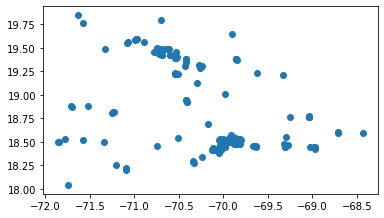

In [11]:
caipy_gfd_path = f'{data_dir}/geo/parsed/care-centers/partial/Centros_CAIPI_correctedV1.geojson'
if os.path.isfile(caipy_gfd_path):
    print(f'loading from: {caipy_gfd_path}')
    caipi_gdf = gpd.read_file(caipy_gfd_path)
    
else:
    print(f'building geojson')
    caipi_df = pd.read_csv(
        f"{data_dir}/other/Centros CAIPI con Georreferencia-correctedV1.csv")
    caipi_df.loc[:, 'geometry'] = caipi_df[['Longitud', 'Latitud']].apply(
        lambda *args: Point(tuple(*args)), axis=1)
    caipi_gdf = gpd.GeoDataFrame(caipi_df, crs="EPSG:4326", geometry='geometry')
    protected_save(
        lambda gdf, path: gdf.to_file(path, driver="GeoJSON"), 
        caipi_gdf, caipy_gfd_path, ask_before_save=None
    )
caipi_gdf.plot()

# Simplify

<AxesSubplot:>

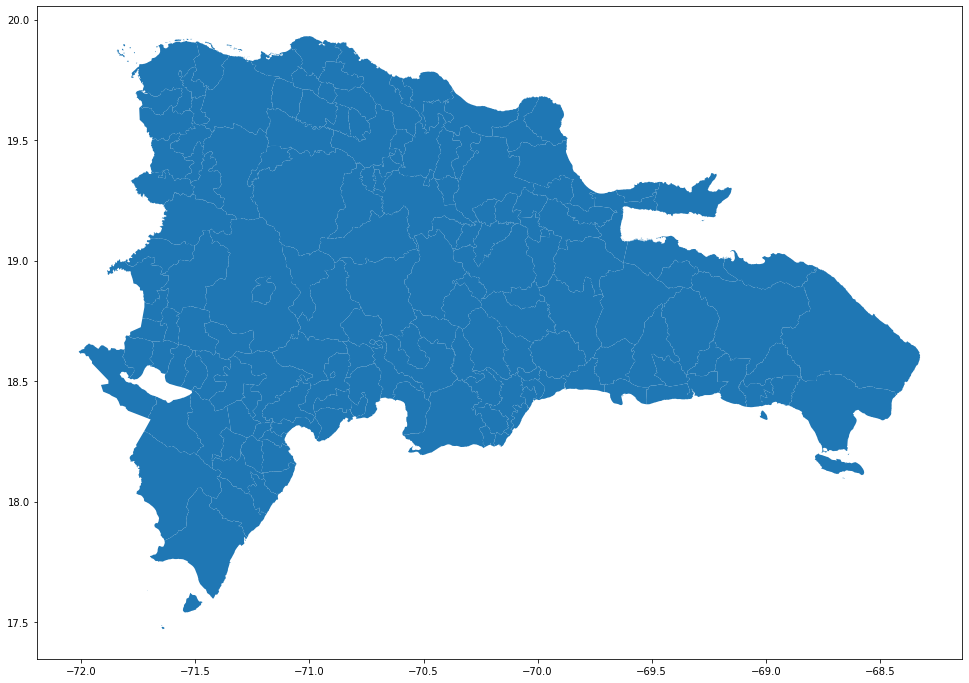

In [14]:
do_munis_simplified_gdf = municipalities_gpd.copy()
do_munis_simplified_gdf = do_munis_simplified_gdf.to_crs(crs="EPSG:4326")
tolerance_macro = 9e-5 # 3e-3
do_munis_simplified_gdf.loc[:, 'geometry'] = \
    do_munis_simplified_gdf.geometry.simplify(tolerance_macro)
do_munis_simplified_gdf.plot(figsize=(20, 12))

In [15]:
protected_save(
    lambda gdf, path: gdf.to_file(path, driver="GeoJSON"), 
    do_munis_simplified_gdf, 
    f'{data_dir}/geo/parsed/municipality/municipalities-s{tolerance_macro:.0e}'
    '.geojson', ask_before_save=None
)

skip saving


# Municipality - Parse

## Municipality codes

In [16]:
provinces_codes.loc[:,'Provincia'] = provinces_codes.loc[:,'Provincia'].str.strip()

In [17]:
provinces_codes.Provincia.unique()

array(['DISTRITO NACIONAL', 'AZUA', 'BAORUCO', 'BARAHONA', 'DAJABÓN',
       'DUARTE', 'ELÍAS PIÑA', 'EL SEIBO', 'ESPAILLAT', 'INDEPENDENCIA',
       'LA ALTAGRACIA', 'LA ROMANA', 'LA VEGA', 'MARÍA TRINIDAD SÁNCHEZ',
       'MONTE CRISTI', 'PEDERNALES', 'PERAVIA', 'PUERTO PLATA',
       'HERMANAS MIRABAL', 'SAMANÁ', 'SAN CRISTÓBAL', 'SAN JUAN',
       'SAN PEDRO DE MACORÍS', 'SÁNCHEZ RAMÍREZ', 'SANTIAGO',
       'SANTIAGO RODRÍGUEZ', 'VALVERDE', 'MONSEÑOR NOUEL', 'MONTE PLATA',
       'HATO MAYOR', 'SAN JOSÉ DE OCOA', 'SANTO DOMINGO'], dtype=object)

In [18]:
do_munis_simplified_gdf.loc[:, 'Provincia'] = do_munis_simplified_gdf[
    'ADM2_ES'].str.replace('Provincia', '').str.strip(' ').str.strip('\n').str.upper()

In [19]:
do_munis_simplified_gdf.Provincia.unique()

array(['DUARTE', 'HERMANAS MIRABAL', 'MARÍA TRINIDAD SÁNCHEZ', 'SAMANÁ',
       'DAJABÓN', 'MONTE CRISTI', 'SANTIAGO RODRÍGUEZ', 'VALVERDE',
       'ESPAILLAT', 'PUERTO PLATA', 'SANTIAGO', 'LA VEGA',
       'MONSEÑOR NOUEL', 'SÁNCHEZ RAMÍREZ', 'ELÍAS PIÑA', 'SAN JUAN',
       'BAORUCO', 'BARAHONA', 'INDEPENDENCIA', 'PEDERNALES', 'HATO MAYOR',
       'MONTE PLATA', 'SAN PEDRO DE MACORÍS', 'DISTRITO NACIONAL',
       'SANTO DOMINGO', 'AZUA', 'PERAVIA', 'SAN CRISTÓBAL',
       'SAN JOSÉ DE OCOA', 'EL SEIBO', 'LA ALTAGRACIA', 'LA ROMANA'],
      dtype=object)

In [21]:
merged_gdf 

,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_REF,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE,ADM3_ES,ADM3_REF,ADM3_PCODE,geometry,Provincia,Código de provincia,Municipio cabecera,Ciudad capital,municipality_key,Municipio
0,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,Municipio Arenoso,DO010102,"POLYGON ((-69.86194 19.23879, -69.85863 19.238...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0602,Arenoso
1,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Castillo,Municipio Castillo,DO010103,"POLYGON ((-70.05599 19.30336, -70.05177 19.303...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0603,Castillo
2,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Eugenio María de Hostos,Municipio Eugenio Maria de Hostos,DO010107,"POLYGON ((-70.00512 19.20249, -70.00669 19.198...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0607,Eugenio María de Hostos
3,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Las Guáranas,Municipio Las Guaranas,DO010106,"POLYGON ((-70.18121 19.25342, -70.17915 19.252...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0606,Las Guáranas
4,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Pimentel,Municipio Pimentel,DO010104,"POLYGON ((-70.11443 19.28060, -70.11207 19.279...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0604,Pimentel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Altagracia,Provincia La Altagracia,DO1002,Municipio Higüey,Municipio Higuey,DO100201,"POLYGON ((-68.77574 18.97415, -68.77499 18.973...",La Altagracia,11,Higüey,Salvaleón de Higüey,1101,Higüey
151,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Altagracia,Provincia La Altagracia,DO1002,Municipio San Rafael del Yuma,Municipio San Rafael del Yuma,DO100202,"MULTIPOLYGON (((-68.63411 18.19846, -68.63373 ...",La Altagracia,11,Higüey,Salvaleón de Higüey,1102,San Rafael del Yuma
152,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Guaymate,Municipio Guaymate,DO100302,"POLYGON ((-68.95329 18.65861, -68.95236 18.658...",La Romana,12,La Romana,La Romana,1202,Guaymate
153,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio La Romana,Municipio La Romana,DO100301,"MULTIPOLYGON (((-68.65241 18.09619, -68.65443 ...",La Romana,12,La Romana,La Romana,1201,La Romana


In [22]:
inspect_nulls(merged_gdf)

Series([], dtype: int64)

## Number of CAIPIS
### Municipality
<a id='merge-n-caipis'></a>

In [23]:
# municipality name match
normalized_muni_col = 'norm_municipio'
caipi_stats_df = caipi_gdf.assign(**{
    normalized_muni_col: lambda df: name_normalizer(df.Municipio).str.replace(
        'bisono (navarrete)', 'bisono', regex=False)}
                                 # ).dropna(subset=['Longitud']
                                         ).groupby(
    normalized_muni_col, as_index=False)[['NumCentro']].count()
caipi_stats_df.shape

muni_caipis_gdf = merged_gdf.assign(**{
    normalized_muni_col: lambda df: name_normalizer(df.Municipio)}).merge(
    caipi_stats_df, how='outer', indicator=True).rename(
    columns={'NumCentro': 'caipi_sum'})

In [24]:
print(caipi_gdf.columns)
print(muni_caipis_gdf.columns)

Index(['Region', 'Provincia', 'Municipio', 'NumCentro', 'Centro', 'Tipo',
       'Direccion', 'Latitud', 'Longitud', 'geometry'],
      dtype='object')
Index(['ADM0_EN', 'ADM0_ES', 'ADM0_PCODE', 'ADM1_ES', 'ADM1_REF', 'ADM1_PCODE',
       'ADM2_ES', 'ADM2_REF', 'ADM2_PCODE', 'ADM3_ES', 'ADM3_REF',
       'ADM3_PCODE', 'geometry', 'Provincia', 'Código de   provincia',
       'Municipio cabecera', 'Ciudad capital', 'municipality_key', 'Municipio',
       'norm_municipio', 'caipi_sum', '_merge'],
      dtype='object')


In [25]:
caipi_gdf.head()

,Region,Provincia,Municipio,NumCentro,Centro,Tipo,Direccion,Latitud,Longitud,geometry
0,ESTE,LA ALTAGRACIA,HIGuEY,1,LA MALENA,CAIPI,"CALLE LEO TAVAREZ, ESQUINA CALLE FIDEL RIJO, M...",18.59188,-68.71111,POINT (-68.71111 18.59188)
1,ESTE,LA ALTAGRACIA,HIGuEY,2,LA CRISTINITA,CAIPI,"BARRIO CRISTINITA, CALLE ENTRADA CRISTINITA (A...",18.59381,-68.43489,POINT (-68.43489 18.59381)
2,NORTE OCCIDENTAL,SANTIAGO,BISONo (NAVARRETE),3,27 DE FEBRERO,CAIPI,"CALLE PRINCIPAL, BARRIO 27 DE FEBRERO, VILLA B...",19.56206,-70.88979,POINT (-70.88979 19.56206)
3,METROPOLITANA,SAN CRISToBAL,SAN CRISToBAL,4,LOS MOLINA,CAIPI,"CALLE MeXICO # 1, CASI ESQUINA AUTOPISTA 6 DE...",18.42852,-70.11652,POINT (-70.11652 18.42852)
4,METROPOLITANA,SANTO DOMINGO,SANTO DOMINGO ESTE,5,EL ALMIRANTE,CAIPI,"C/ LA PISTA, EN LA MISMA ZONA DEL ALMIRANTE, (...",18.52480,-69.81555,POINT (-69.81555 18.52480)


In [26]:
print(merged_gdf.columns)
print(caipi_stats_df.columns)

Index(['ADM0_EN', 'ADM0_ES', 'ADM0_PCODE', 'ADM1_ES', 'ADM1_REF', 'ADM1_PCODE',
       'ADM2_ES', 'ADM2_REF', 'ADM2_PCODE', 'ADM3_ES', 'ADM3_REF',
       'ADM3_PCODE', 'geometry', 'Provincia', 'Código de   provincia',
       'Municipio cabecera', 'Ciudad capital', 'municipality_key',
       'Municipio'],
      dtype='object')
Index(['norm_municipio', 'NumCentro'], dtype='object')


In [27]:
assert not muni_caipis_gdf._merge.eq('right_only').any(), (
    'There are municipality names which are not completely normalized'
    f'{muni_caipis_gdf[muni_caipis_gdf._merge.eq("right_only")]}'
)
muni_caipis_gdf.drop(['_merge'], axis=1, inplace=True)

In [28]:
muni_caipis_gdf

,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_REF,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE,ADM3_ES,...,ADM3_PCODE,geometry,Provincia,Código de provincia,Municipio cabecera,Ciudad capital,municipality_key,Municipio,norm_municipio,caipi_sum
0,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,...,DO010102,"POLYGON ((-69.86194 19.23879, -69.85863 19.238...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0602,Arenoso,arenoso,NaN
1,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Castillo,...,DO010103,"POLYGON ((-70.05599 19.30336, -70.05177 19.303...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0603,Castillo,castillo,NaN
2,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Eugenio María de Hostos,...,DO010107,"POLYGON ((-70.00512 19.20249, -70.00669 19.198...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0607,Eugenio María de Hostos,eugenio maria de hostos,NaN
3,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Las Guáranas,...,DO010106,"POLYGON ((-70.18121 19.25342, -70.17915 19.252...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0606,Las Guáranas,las guaranas,NaN
4,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Pimentel,...,DO010104,"POLYGON ((-70.11443 19.28060, -70.11207 19.279...",Duarte,6,San Francisco de Macorís,San Francisco de Macorís,0604,Pimentel,pimentel,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Altagracia,Provincia La Altagracia,DO1002,Municipio Higüey,...,DO100201,"POLYGON ((-68.77574 18.97415, -68.77499 18.973...",La Altagracia,11,Higüey,Salvaleón de Higüey,1101,Higüey,higuey,4.0
151,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Altagracia,Provincia La Altagracia,DO1002,Municipio San Rafael del Yuma,...,DO100202,"MULTIPOLYGON (((-68.63411 18.19846, -68.63373 ...",La Altagracia,11,Higüey,Salvaleón de Higüey,1102,San Rafael del Yuma,san rafael del yuma,NaN
152,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Guaymate,...,DO100302,"POLYGON ((-68.95329 18.65861, -68.95236 18.658...",La Romana,12,La Romana,La Romana,1202,Guaymate,guaymate,NaN
153,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio La Romana,...,DO100301,"MULTIPOLYGON (((-68.65241 18.09619, -68.65443 ...",La Romana,12,La Romana,La Romana,1201,La Romana,la romana,3.0


### Testing spacial and data discrepancy


In [29]:
smerge_df = gpd.sjoin(caipi_gdf, merged_gdf, op='within')

discrepancy_gdf = smerge_df[name_normalizer(smerge_df.Municipio_left).ne(
    name_normalizer(smerge_df.Municipio_right))].drop(2)

if not discrepancy_gdf.empty:
    discrepancy_gdf.to_file('discrepancy.geojson', driver="GeoJSON")

unlimit_display_option('display.max_colwidth', discrepancy_gdf[[
    'Centro', 'Direccion']])
cdisplay(discrepancy_gdf)e

,Centro,Direccion


,Region,Provincia_left,Municipio_left,NumCentro,Centro,Tipo,Direccion,Latitud,Longitud,geometry,index_right,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_REF,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE,ADM3_ES,ADM3_REF,ADM3_PCODE,Provincia_right,Código de provincia,Municipio cabecera,Ciudad capital,municipality_key,Municipio_right


In [30]:
smerge_df

,Region,Provincia_left,Municipio_left,NumCentro,Centro,Tipo,Direccion,Latitud,Longitud,geometry,...,ADM2_PCODE,ADM3_ES,ADM3_REF,ADM3_PCODE,Provincia_right,Código de provincia,Municipio cabecera,Ciudad capital,municipality_key,Municipio_right
0,ESTE,LA ALTAGRACIA,HIGuEY,1,LA MALENA,CAIPI,"CALLE LEO TAVAREZ, ESQUINA CALLE FIDEL RIJO, M...",18.591880,-68.711110,POINT (-68.71111 18.59188),...,DO1002,Municipio Higüey,Municipio Higuey,DO100201,La Altagracia,11,Higüey,Salvaleón de Higüey,1101,Higüey
1,ESTE,LA ALTAGRACIA,HIGuEY,2,LA CRISTINITA,CAIPI,"BARRIO CRISTINITA, CALLE ENTRADA CRISTINITA (A...",18.593810,-68.434890,POINT (-68.43489 18.59381),...,DO1002,Municipio Higüey,Municipio Higuey,DO100201,La Altagracia,11,Higüey,Salvaleón de Higüey,1101,Higüey
139,ESTE,LA ALTAGRACIA,HIGuEY,1597,ESTANCIA INFANTIL EL NARANJO,CAIPI,C/ Aminodoro Pepen #43 Sector Los Sotos Higuey,18.603063,-68.707182,POINT (-68.70718 18.60306),...,DO1002,Municipio Higüey,Municipio Higuey,DO100201,La Altagracia,11,Higüey,Salvaleón de Higüey,1101,Higüey
2,NORTE OCCIDENTAL,SANTIAGO,BISONo (NAVARRETE),3,27 DE FEBRERO,CAIPI,"CALLE PRINCIPAL, BARRIO 27 DE FEBRERO, VILLA B...",19.562060,-70.889790,POINT (-70.88979 19.56206),...,DO0303,Municipio Bisonó,Municipio Bisono,DO030302,Santiago,25,Santiago,Santiago de Los Caballeros,2502,Bisonó
3,METROPOLITANA,SAN CRISToBAL,SAN CRISToBAL,4,LOS MOLINA,CAIPI,"CALLE MeXICO # 1, CASI ESQUINA AUTOPISTA 6 DE...",18.428520,-70.116520,POINT (-70.11652 18.42852),...,DO0903,Municipio San Cristóbal,Municipio San Cristobal,DO090301,San Cristóbal,21,San Cristóbal,San Cristóbal,2101,San Cristóbal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,METROPOLITANA,SAN CRISToBAL,SAN GREGORIO DE NIGUA,1589,ESTANCIA INFANTIL SAN GREGORIO,CAIPI,C/ Duarte #17 San Gregorio de Nigua San Cri...,18.383168,-70.052972,POINT (-70.05297 18.38317),...,DO0903,Municipio San Gregorio de Nigua,Municipio San Gregorio de Nigua,DO090307,San Cristóbal,21,San Cristóbal,San Cristóbal,2107,San Gregorio de Nigua
136,ESTE,SAN PEDRO DE MACORiS,CONSUELO,1594,ESTANCIA INFANTIL CONSUELO,CAIPI,C/ La Aviacion #172 Sector Los Ladrillos Sa...,18.550178,-69.298329,POINT (-69.29833 18.55018),...,DO0703,Municipio Consuelo,Municipio Consuelo,DO070304,San Pedro De Macorís,23,San Pedro de Macorís,San Pedro de Macorís,2304,Consuelo
138,ESTE,HATO MAYOR,HATO MAYOR,1596,ESTANCIA INFANTIL ARCO IRIS,CAIPI,C/ Palo Hincado #33 Las Cuamas Hato Mayor ...,18.760220,-69.253024,POINT (-69.25302 18.76022),...,DO0701,Municipio Hato Mayor,Municipio Hato Mayor,DO070101,Hato Mayor,30,Hato Mayor,Hato Mayor del Rey,3001,Hato Mayor
157,NORTE OCCIDENTAL,SANTIAGO,LICEY AL MEDIO,1615,ESTANCIA INFANTIL FLOR SILVESTRE I,CAIPI,C/ Mella Sector Los Rodriguez Licey al Medio...,19.425245,-70.598975,POINT (-70.59898 19.42525),...,DO0303,Municipio Licey al Medio,Municipio Licey al Medio,DO030304,Santiago,25,Santiago,Santiago de Los Caballeros,2504,Licey al Medio


In the following cell, **10.5** correspond to 21 CAIPI's which are not geolocated. To actually see discrepancy, in cell [merge-n-caipis](#merge-n-caipis), `dropna` should not be commented.

In [ ]:
discrepancy = muni_caipis_gdf.set_index('municipality_key')[[
    'caipi_sum']].dropna().astype(int).join(
    -1 * smerge_df.groupby('municipality_key')[['NumCentro']].count(
).astype('Int64')).sort_index()
discrepancy = discrepancy.assign(difference=-1 * discrepancy.sum(1))
discrepancy.loc[:, 'NumCentro'] = discrepancy.loc[:, 'NumCentro'].abs()
display(discrepancy.rename(columns={
    'caipi_sum': '# caipi (name)', 'NumCentro': '# caipi (spatial)'}))
f'Number of caipis differently allocated: {discrepancy.difference.abs().div(2).sum()}'

In [33]:
protected_save(
    lambda gdf, path: gdf.to_file(path, driver="GeoJSON"), muni_caipis_gdf, 
    f'{data_dir}/geo/parsed/municipality/recodified_municipalities-withCAIPIs-s{tolerance_macro:.0e}.geojson', ask_before_save=True
)

trying to save at: /home/coro/Dropbox/Github/criteria-dominicana/data/geo/parsed/municipality/recodified_municipalities-withCAIPIs-s9e-05.geojson


confirm saving? (y/n) 


not saved


In [37]:
[x for x in muni_caipis_gdf.columns if x not in municipalities_gpd.columns]

['Provincia',
 'Código de   provincia',
 'Municipio cabecera',
 'Ciudad capital',
 'municipality_key',
 'Municipio',
 'norm_municipio',
 'caipi_sum']

# Neighborhoods -  Parse

In [10]:
gdf_neighbor = gpd.read_file(
    f'{data_dir}/geo/raw/Neighborhood/BPCenso2010.shp')

<AxesSubplot:>

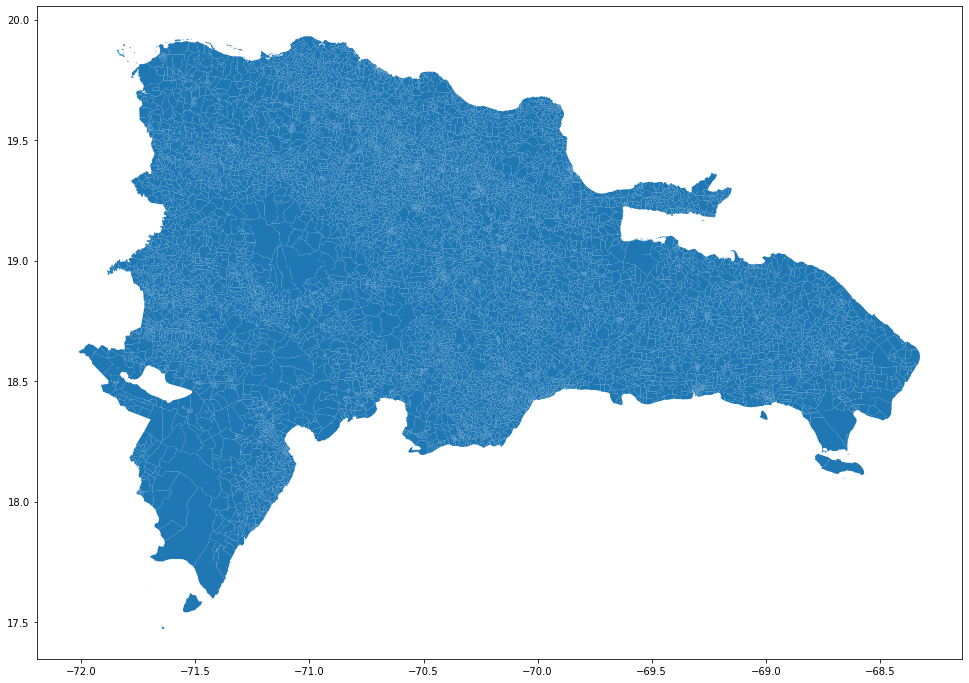

In [11]:
gdf_neighbor = gdf_neighbor.to_crs(crs="EPSG:4326")
tolerance_macro = 9e-5 # 3e-3
gdf_neighbor.loc[:, 'geometry'] = \
    gdf_neighbor.geometry.simplify(tolerance_macro)
gdf_neighbor.plot(figsize=(20, 12))

### Create Neighborhood keys

In [12]:
gdf_neighbor['municipality_key'] = gdf_neighbor['PROV'] + gdf_neighbor['MUN'] 
gdf_neighbor['neighborhood_key'] =  gdf_neighbor['PROV'] + gdf_neighbor['MUN'] + gdf_neighbor['DM'] + gdf_neighbor['SECC'] + gdf_neighbor['BP']

In [41]:
df_neigh_muni_caipis_DEBUG = gdf_neighbor.merge( muni_caipis_gdf, on  ='municipality_key')

In [18]:
for col in ['DM', 'MUN', 'SECC', 'BP']:
        print('\n\n------------------------------------------------')
        print(col)
        #print(household_parsed_df[col].describe())
        print(gdf_neighbor[col].unique())
        



------------------------------------------------
DM
['01' '03' '02' '04' '05' '06' '07' '08' '09' '10' '11']


------------------------------------------------
MUN
['01' '03' '02' '05' '06' '04' '07' '11' '08' '10' '09']


------------------------------------------------
SECC
['04' '03' '08' '02' '05' '09' '06' '07' '10' '11' '12' '01' '14' '15'
 '16' '17' '13']


------------------------------------------------
BP
['001' '003' '004' '006' '005' '008' '009' '007' '002' '010' '011' '013'
 '012' '014' '024' '023' '027' '020' '019' '018' '016' '017' '030' '022'
 '029' '021' '028' '026' '015' '025' '031' '036' '035' '033' '032' '034'
 '037' '039' '038' '040' '041' '053' '054' '065' '052' '055' '051' '043'
 '042' '064' '056' '066' '063' '062' '050' '049' '057' '061' '048' '058'
 '059' '067' '060' '068' '069' '070' '044' '045' '046' '047' '071' '072'
 '073' '074' '075' '076' '077' '078' '079' '080' '081' '082']


## Number of CAIPIS

In [42]:
df_neighbor_caipi = gpd.sjoin(caipi_gdf, gdf_neighbor, op='within')

discrepancy_gdf = smerge_df[name_normalizer(smerge_df.Municipio_left).ne(
    name_normalizer(smerge_df.Municipio_right))].drop(2)

if not discrepancy_gdf.empty:
    discrepancy_gdf.to_file('discrepancy.geojson', driver="GeoJSON")

unlimit_display_option('display.max_colwidth', discrepancy_gdf[[
    'Centro', 'Direccion']])
cdisplay(discrepancy_gdf)

,Centro,Direccion


,Region,Provincia_left,Municipio_left,NumCentro,Centro,Tipo,Direccion,Latitud,Longitud,geometry,index_right,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_REF,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE,ADM3_ES,ADM3_REF,ADM3_PCODE,Provincia_right,Código de provincia,Municipio cabecera,Ciudad capital,municipality_key,Municipio_right


In [62]:
gdf_neighbor.shape

(12565, 13)

In [ ]:
for col in gdf_neighbor.columns:
    print('\n-------------------------------\n' + col)
    print(gdf_neighbor[col].unique()[:5])
len(gdf_neighbor.TOPONIMIA.unique())

,Region,Provincia,Municipio,NumCentro,Centro,Tipo,Direccion,Latitud,Longitud,geometry
0,ESTE,LA ALTAGRACIA,HIGuEY,1,LA MALENA,CAIPI,"CALLE LEO TAVAREZ, ESQUINA CALLE FIDEL RIJO, M...",18.59188,-68.71111,POINT (-68.71111 18.59188)
1,ESTE,LA ALTAGRACIA,HIGuEY,2,LA CRISTINITA,CAIPI,"BARRIO CRISTINITA, CALLE ENTRADA CRISTINITA (A...",18.59381,-68.43489,POINT (-68.43489 18.59381)


(177, 10)

<AxesSubplot:>

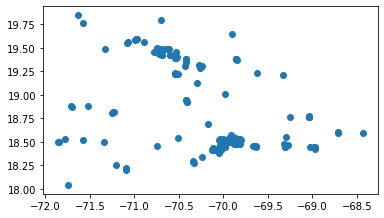

In [44]:
cdisplay(caipi_gdf.head(2), caipi_gdf.shape, caipi_gdf.plot())

### Sjoin caipi_gdf - gdf_neighbor
It's important to note that there 21 CAPI without GEOPOINT information.


In [57]:
#! TODO: Create code to allocate those 21 CAPIs to the center of the municipality or look foe them in google.
df_neighbor_caipi= gpd.sjoin(caipi_gdf, gdf_neighbor, op='within')
#Not within CAPIS 
df_neighbor_caipi_left = gpd.sjoin(caipi_gdf, gdf_neighbor, op='within', how='left')
df_neighbor_caipi_notfound = df_neighbor_caipi_left[df_neighbor_caipi_left.PROV.isna()]


,Region,Provincia,Municipio,NumCentro,Centro,Tipo,Direccion,Latitud,Longitud,geometry,index_right,PROV,MUN,DM,SECC,BP,TOPONIMIA,REG,ZONA,ENLACE,CODIGO,municipality_key,neighborhood_key
0,ESTE,LA ALTAGRACIA,HIGuEY,1,LA MALENA,CAIPI,"CALLE LEO TAVAREZ, ESQUINA CALLE FIDEL RIJO, M...",18.59188,-68.71111,POINT (-68.71111 18.59188),8865,11,01,01,01,032,LA MALENA,08,1,0811010101032,08110101101032,1101,11010101032
1,ESTE,LA ALTAGRACIA,HIGuEY,2,LA CRISTINITA,CAIPI,"BARRIO CRISTINITA, CALLE ENTRADA CRISTINITA (A...",18.59381,-68.43489,POINT (-68.43489 18.59381),11632,11,01,03,04,027,LAS DOS JARDAS,08,2,0811010304027,08110103204027,1101,11010304027


(156, 23)

<AxesSubplot:>

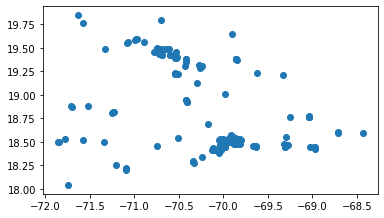

In [59]:
cdisplay(df_neighbor_caipi.head(2), df_neighbor_caipi.shape, df_neighbor_caipi.plot())

In [47]:
# df_neighbor_caipi_stats: how many CAPI's we have in each neighborhood
df_neighbor_caipi_stats = df_neighbor_caipi\
    .groupby('neighborhood_key')[['NumCentro']].count()\
    .reset_index()\
    .rename(columns = {'NumCentro': 'caipi_sum_neighbor'})

gdf_neighbor_stats = gdf_neighbor.merge(df_neighbor_caipi_stats, on ='neighborhood_key', how= 'left')
gdf_neighbor_stats.columns

muni_caipis_gdf = muni_caipis_gdf.rename(columns = {'geometry' : 'geometry_muni'})
#We can't have multiple geomtry variables in a single geo file
del muni_caipis_gdf['geometry_muni']

muni_neighbor_caipis_gdf  = muni_caipis_gdf.merge(gdf_neighbor_stats, on = 'municipality_key', how='outer', indicator =True)

In [48]:
muni_neighbor_caipis_gdf.columns

Index(['ADM0_EN', 'ADM0_ES', 'ADM0_PCODE', 'ADM1_ES', 'ADM1_REF', 'ADM1_PCODE',
       'ADM2_ES', 'ADM2_REF', 'ADM2_PCODE', 'ADM3_ES', 'ADM3_REF',
       'ADM3_PCODE', 'Provincia', 'Código de   provincia',
       'Municipio cabecera', 'Ciudad capital', 'municipality_key', 'Municipio',
       'norm_municipio', 'caipi_sum', 'PROV', 'MUN', 'DM', 'SECC', 'BP',
       'TOPONIMIA', 'REG', 'ZONA', 'ENLACE', 'CODIGO', 'geometry',
       'neighborhood_key', 'caipi_sum_neighbor', '_merge'],
      dtype='object')

In [49]:
assert not muni_neighbor_caipis_gdf._merge.eq('right_only').any(), (
    'There are municipality names which are not completely normalized'
    f'{muni_neighbor_caipis_gdf[muni_neighbor_caipis_gdf._merge.eq("right_only")]}'
)
muni_neighbor_caipis_gdf.drop(['_merge'], axis=1, inplace=True)

### Comparing CAIPI count in municipality and neighborhood

In [50]:

muni_neighbor_caipis_gdf['caipi_sum'] = muni_neighbor_caipis_gdf['caipi_sum'].replace(np.nan, 0) 
df_compare_muni_neigh = muni_neighbor_caipis_gdf.groupby('municipality_key')['caipi_sum_neighbor'].sum().reset_index().merge( \
muni_neighbor_caipis_gdf.groupby('municipality_key')['caipi_sum'].first().reset_index())

#### Checkpoint: Missing CAIPIS per municipality in Neighborhood level

In [51]:
df_compare_muni_neigh[df_compare_muni_neigh['caipi_sum_neighbor'] != df_compare_muni_neigh['caipi_sum']]

,municipality_key,caipi_sum_neighbor,caipi_sum
1,0201,1.0,2.0
11,0301,0.0,1.0
16,0401,2.0,3.0
57,1101,3.0,4.0
61,1203,1.0,3.0
78,1701,3.0,4.0
80,1801,1.0,2.0
86,1807,0.0,1.0
99,2105,1.0,2.0
103,2201,3.0,4.0


### Save Neighboorhood file 

In [52]:
protected_save(
    lambda gdf, path: gdf.to_file(path, driver="GeoJSON"), muni_neighbor_caipis_gdf, 
    f'{data_dir}/geo/parsed/neighborhood/recodified_neighborhoods-'
    f'withCAIPIs-s{tolerance_macro:.0e}.geojson', ask_before_save=True
)

trying to save at: /home/coro/Dropbox/Github/criteria-dominicana/data/geo/parsed/neighborhood/recodified_neighborhoods-withCAIPIs-s9e-05.geojson


confirm saving? (y/n) n


not saved


In [53]:
muni_neighbor_caipis_gdf.columns

Index(['ADM0_EN', 'ADM0_ES', 'ADM0_PCODE', 'ADM1_ES', 'ADM1_REF', 'ADM1_PCODE',
       'ADM2_ES', 'ADM2_REF', 'ADM2_PCODE', 'ADM3_ES', 'ADM3_REF',
       'ADM3_PCODE', 'Provincia', 'Código de   provincia',
       'Municipio cabecera', 'Ciudad capital', 'municipality_key', 'Municipio',
       'norm_municipio', 'caipi_sum', 'PROV', 'MUN', 'DM', 'SECC', 'BP',
       'TOPONIMIA', 'REG', 'ZONA', 'ENLACE', 'CODIGO', 'geometry',
       'neighborhood_key', 'caipi_sum_neighbor'],
      dtype='object')

<AxesSubplot:>

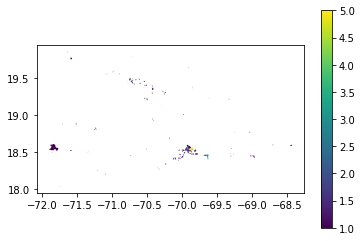

In [54]:
muni_neighbor_caipis_gdf.plot(column='caipi_sum_neighbor', legend=True)

In [55]:
protected_save(
    lambda gdf, path: gdf.to_csv(path), muni_neighbor_caipis_gdf, 
    f'{data_dir}/geo/parsed/neighborhood/recodified_neighborhoods-'
    f'withCAIPIs-s{tolerance_macro:.0e}.csv', ask_before_save=True
)

trying to save at: /home/coro/Dropbox/Github/criteria-dominicana/data/geo/parsed/neighborhood/recodified_neighborhoods-withCAIPIs-s9e-05.csv


confirm saving? (y/n) n


not saved


In [56]:
muni_neighbor_caipis_gdf

,ADM0_EN,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_REF,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE,ADM3_ES,...,SECC,BP,TOPONIMIA,REG,ZONA,ENLACE,CODIGO,geometry,neighborhood_key,caipi_sum_neighbor
0,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,...,03,003,RINCÓN BEBEDERO,03,2,0306020203003,03060202203003,"POLYGON ((-69.67577 19.17459, -69.67491 19.174...",06020203003,NaN
1,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,...,03,002,EL GUAYABO,03,2,0306020203002,03060202203002,"POLYGON ((-69.72082 19.22422, -69.69983 19.221...",06020203002,NaN
2,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,...,02,001,LAS CARRERAS,03,2,0306020202001,03060202202001,"POLYGON ((-69.71262 19.14625, -69.71249 19.145...",06020202001,NaN
3,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,...,02,004,LOS CACAOS,03,2,0306020202004,03060202202004,"POLYGON ((-69.72749 19.18725, -69.72912 19.182...",06020202004,NaN
4,Dominican Republic,República Dominicana,DO,Región Cibao Nordeste,Region Cibao Nordeste,DO01,Provincia Duarte,Provincia Duarte,DO0101,Municipio Arenoso,...,04,003,LOS CHICHONES,03,2,0306020304003,03060203204003,"POLYGON ((-69.77972 19.20191, -69.77976 19.200...",06020304003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Villa Hermosa,...,01,015,SINAÍ,08,1,0812030101015,08120301101015,"POLYGON ((-69.00743 18.43547, -69.00726 18.434...",12030101015,NaN
12561,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Villa Hermosa,...,01,005,VILLA ZORRILLA,08,1,0812030101005,08120301101005,"POLYGON ((-69.00679 18.44093, -69.00713 18.438...",12030101005,NaN
12562,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Villa Hermosa,...,01,004,PIEDRA LINDA,08,1,0812030101004,08120301101004,"POLYGON ((-69.00869 18.45137, -69.00747 18.450...",12030101004,NaN
12563,Dominican Republic,República Dominicana,DO,Región Yuma,Region Yuma,DO10,Provincia La Romana,Provincia La Romana,DO1003,Municipio Villa Hermosa,...,01,020,LOS MULOS,08,1,0812030101020,08120301101020,"POLYGON ((-69.02782 18.49119, -69.02606 18.491...",12030101020,NaN
